## Dataset Information

#### The dataset contains a set of 150 records under five attributes: sepal length, sepal width, petal length, petal width and species like Iris Setosa, Iris Versicolor, and Iris Virginica.
#### All the lengths in cm
#### It is a classification Problem.

In [38]:
# Importing modules

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = sns.load_dataset('iris') #load dataset

In [40]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [41]:
df.describe() # stats about data

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [42]:
df.info() #basic info about datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [43]:
df['species'].value_counts() # samples on each class

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

# Preprocessing Dataset

In [44]:

df.isnull().sum() #check null values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Exploratory Data Analysis (EDA)

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

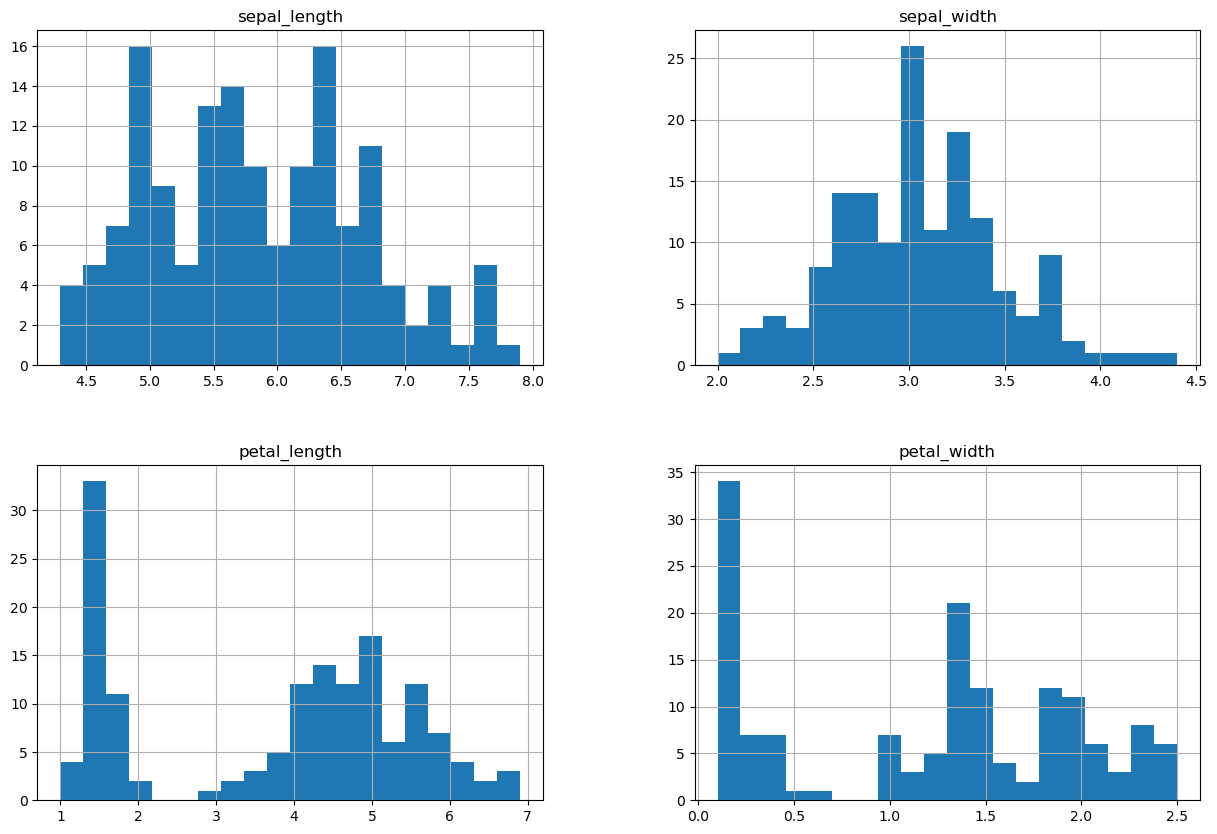

In [45]:
df.hist(bins=20, figsize=(15, 10)) #Histogram

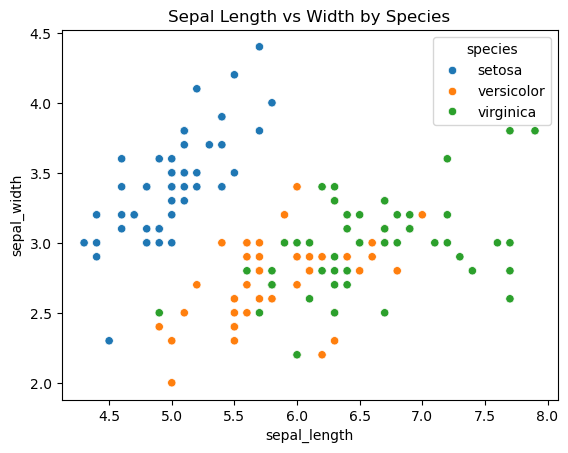

In [46]:
#scatterplot
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species')
plt.title('Sepal Length vs Width by Species')
plt.show()

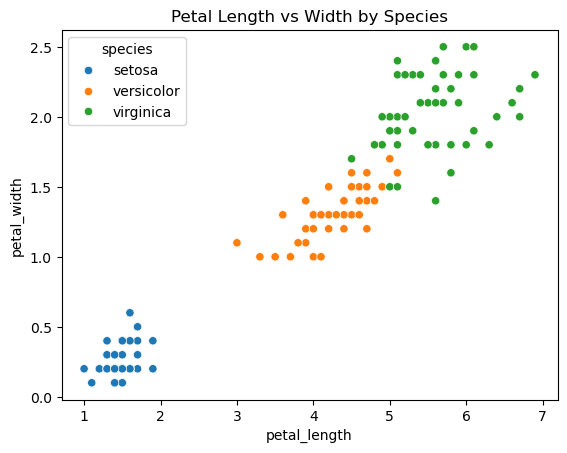

In [47]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')
plt.title('Petal Length vs Width by Species')
plt.show()

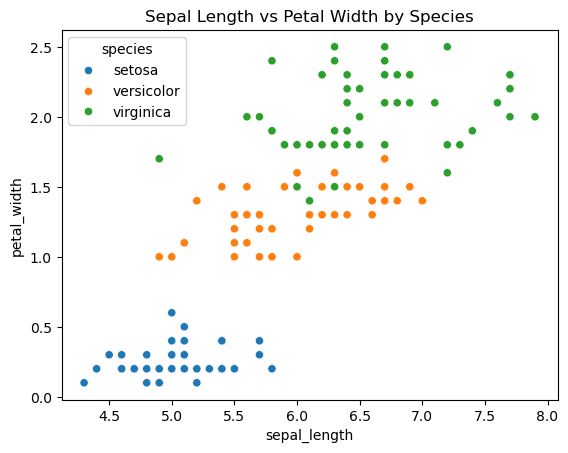

In [48]:
#scatterplot
sns.scatterplot(data=df, x='sepal_length', y='petal_width', hue='species')
plt.title('Sepal Length vs Petal Width by Species')
plt.show()

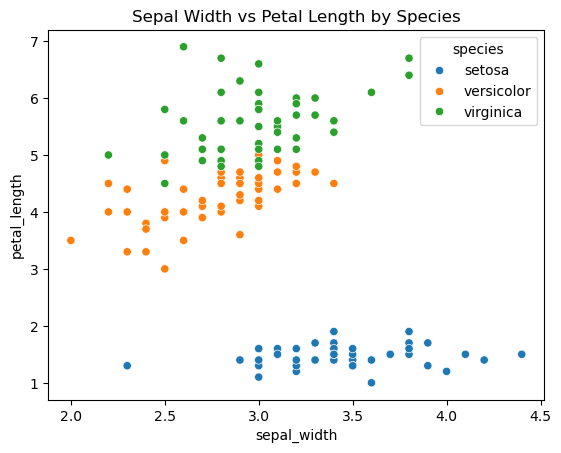

In [49]:
#scatterplot
sns.scatterplot(data=df, x='sepal_width', y='petal_length', hue='species')
plt.title('Sepal Width vs Petal Length by Species')
plt.show()

<Axes: >

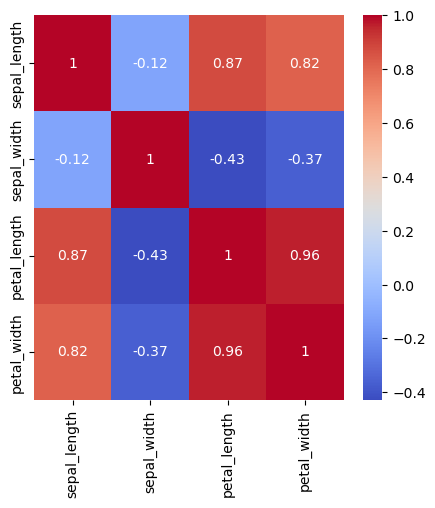

In [50]:
#Coorelation Matrix
df_dum=df.drop(columns='species')
cor =df_dum.corr()
fig ,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cor,annot=True,ax=ax,cmap='coolwarm')

In [14]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
df['species']=le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Model Training

In [51]:
from sklearn.model_selection import train_test_split
# training Data - 80%
# testing Data -20%
x=df.drop(columns='species')
y=df['species']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [52]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train= scalar.fit_transform(x_train)
x_test= scalar.transform(x_test)

In [53]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model =LogisticRegression()

In [54]:
model.fit(x_train,y_train)

LogisticRegression()

In [55]:
#checking Performance of the model
print('Accuracy :',model.score(x_test,y_test)*100)

Accuracy : 93.33333333333333


In [56]:
from sklearn.neighbors import KNeighborsClassifier
model =KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [57]:
#checking Performance of the model
print('Accuracy :',model.score(x_test,y_test)*100)

Accuracy : 93.33333333333333


In [58]:
from sklearn.tree import DecisionTreeClassifier
model =DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [59]:
#checking Performance of the model
print('Accuracy :',model.score(x_test,y_test)*100)

Accuracy : 90.0


In [25]:
#using Decision tree classifier 
# saving the model
import pickle 
filename ='irismodel.sav'
pickle.dump(model,open(filename,'wb'))

In [26]:
load_model =pickle.load(open(filename,'rb'))

In [27]:
load_model.predict([[6.0,3.4,4.5,1.6]])

array([2])